In [20]:
print("PRINOM")

PRINOM


# Query_KG with BERT

In [21]:
import pandas as pd

# File path to your dataset
file_path = '/kaggle/input/person-country-device-tree/Person_Country_Device_Tree.csv'  # Update this with your file's path

# Load the CSV file
data = pd.read_csv(file_path)

data

,Link,Ground_truth
0,http://dbpedia.org/resource/Caitlin_Blackwood,Person
1,http://dbpedia.org/resource/Calli_Cox,Person
2,http://dbpedia.org/resource/Cameron_Hall_(actor),Person
3,http://dbpedia.org/resource/Camilla_Lundén,Person
4,http://dbpedia.org/resource/Camilla_Sparv,Person
...,...,...
395,http://dbpedia.org/resource/Mexico,Country
396,http://dbpedia.org/resource/Moldova,Country
397,http://dbpedia.org/resource/Mongolia,Country
398,http://dbpedia.org/resource/Montenegro,Country


In [22]:
data = data[['Link']]
data = data.drop_duplicates()
data=data.head(300)
data

,Link
0,http://dbpedia.org/resource/Caitlin_Blackwood
1,http://dbpedia.org/resource/Calli_Cox
2,http://dbpedia.org/resource/Cameron_Hall_(actor)
3,http://dbpedia.org/resource/Camilla_Lundén
4,http://dbpedia.org/resource/Camilla_Sparv
...,...
295,http://dbpedia.org/resource/Samsung_Galaxy_Z_F...
296,http://dbpedia.org/resource/Samsung_Infuse_4G
297,http://dbpedia.org/resource/Samsung_Intensity
298,http://dbpedia.org/resource/Samsung_Intensity_II


In [23]:
entities = [entity for entity in data["Link"]]
entities

['http://dbpedia.org/resource/Caitlin_Blackwood',
 'http://dbpedia.org/resource/Calli_Cox',
 'http://dbpedia.org/resource/Cameron_Hall_(actor)',
 'http://dbpedia.org/resource/Camilla_Lundén',
 'http://dbpedia.org/resource/Camilla_Sparv',
 'http://dbpedia.org/resource/Camille_Japy',
 'http://dbpedia.org/resource/Camille_Razat',
 'http://dbpedia.org/resource/Candy_Apples',
 'http://dbpedia.org/resource/Capri_Anderson',
 'http://dbpedia.org/resource/Caressa_Savage',
 'http://dbpedia.org/resource/Carin_Swensson',
 'http://dbpedia.org/resource/Carl-Axel_Elfving',
 'http://dbpedia.org/resource/Carl-Axel_Heiknert',
 'http://dbpedia.org/resource/Carl-Gunnar_Wingård',
 'http://dbpedia.org/resource/Carl_Barcklind',
 'http://dbpedia.org/resource/Carl_Billquist',
 'http://dbpedia.org/resource/Carl_Forgione',
 'http://dbpedia.org/resource/Carl_Hagman',
 'http://dbpedia.org/resource/Carl_Ström',
 'http://dbpedia.org/resource/Carles_Canut',
 'http://dbpedia.org/resource/Carlos_Cuevas',
 'http://dbped

In [24]:
!pip install sentence-transformers


In [25]:
import pandas as pd
import requests
import numpy as np
from sentence_transformers import SentenceTransformer

In [26]:
# ✅ Define DBpedia SPARQL Endpoint
SPARQL_ENDPOINT = "https://dbpedia.org/sparql"

# ✅ Function to Fetch Labels & Abstracts for Entities
def fetch_text_data(entity):
    query = f"""
    SELECT ?label ?abstract WHERE {{
        <{entity}> rdfs:label ?label .
        OPTIONAL {{ <{entity}> dbo:abstract ?abstract . FILTER (lang(?abstract) = "en") }}
        FILTER (lang(?label) = "en")
    }} LIMIT 1
    """
    response = requests.get(SPARQL_ENDPOINT, params={"query": query, "format": "json"})
    
    if response.status_code == 200:
        results = response.json().get("results", {}).get("bindings", [])
        if results:
            label = results[0].get("label", {}).get("value", "")
            abstract = results[0].get("abstract", {}).get("value", "")
            return f"{label}. {abstract}" if abstract else label
    return ""

# ✅ Fetch Text Descriptions for Entities
entity_texts = [fetch_text_data(entity) for entity in entities]

# ✅ Load BERT Model (Sentence Transformer)
bert_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# ✅ Generate BERT Embeddings
embeddings = bert_model.encode(entity_texts, convert_to_numpy=True)

# ✅ Save Embeddings (Optional)
np.save("bert_embeddings.npy", embeddings)

# ✅ Print Shape of Embeddings
print("Embeddings shape:", embeddings.shape)
print("Sample embedding:", embeddings[0])


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Embeddings shape: (300, 384)
Sample embedding: [-2.04976611e-02 -3.89842615e-02  1.64614804e-02 -5.70617020e-02
  7.95133132e-03 -2.10661590e-02  3.95463295e-02 -4.66352962e-02
  5.74536324e-02 -1.19988536e-02 -2.03756765e-02 -8.58814046e-02
 -4.21691909e-02  5.38352989e-02 -1.19866766e-01 -1.53489728e-02
 -6.64435253e-02 -6.08984120e-02  4.31718450e-04 -1.28987012e-02
 -1.07245788e-01  8.48880783e-02  8.39830097e-03  1.34144658e-02
  2.11795121e-02 -3.59864235e-02  2.74620615e-02 -5.76689653e-02
 -2.12642550e-02  3.74455340e-02  7.66939893e-02 -5.61833056e-03
 -6.72593042e-02  4.21638191e-02  4.92123626e-02  9.51208919e-02
 -1.04593642e-01  4.08986434e-02 -3.89037728e-02  2.64887605e-02
 -5.55976145e-02 -8.84718895e-02 -9.53489158e-04  5.83954938e-02
 -8.95574631e-04 -3.55390422e-02  8.72573182e-02 -4.18385081e-02
 -2.47962028e-02 -8.27533007e-02  1.02794133e-02 -4.46330570e-02
 -7.39978775e-02  4.08902653e-02  1.17690332e-01  8.14756006e-02
  2.39698756e-02 -2.21422724e-02 -4.0025658

In [29]:
entity_texts

['Caitlin Blackwood. Caitlin Blackwood (born 23 June 2000) is an actress from Northern Ireland who played the young Amy Pond in the BBC One TV programme Doctor Who.',
 'Calli Cox. Calli Cox (born February 26, 1977) is an American former pornographic actress.',
 'Cameron Hall (actor). Cameron Hall (6 January 1897 – 19 December 1983) was an English actor. He was born in Hull, East Riding of Yorkshire, and died, aged 86, in Sidmouth, Devon',
 'Camilla Lundén. Anna Camilla Elisabeth Lundén (born 5 May 1967) is a Swedish actress. She has appeared in more than 20 films and television shows since 1987.',
 'Camilla Sparv. Camilla Sparv (born 3 June 1943) is a Swedish actress.',
 'Camille Japy. Camille Japy (born 7 September 1968) is a Belgian-French actress. She has appeared in more than seventy films since 1990.',
 'Camille Razat. Camille Emilie Razat (born 1 March 1994) is a French actress and model. She is known for playing Lea Morel in France 2 drama The Disappearance, and for playing Cami

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

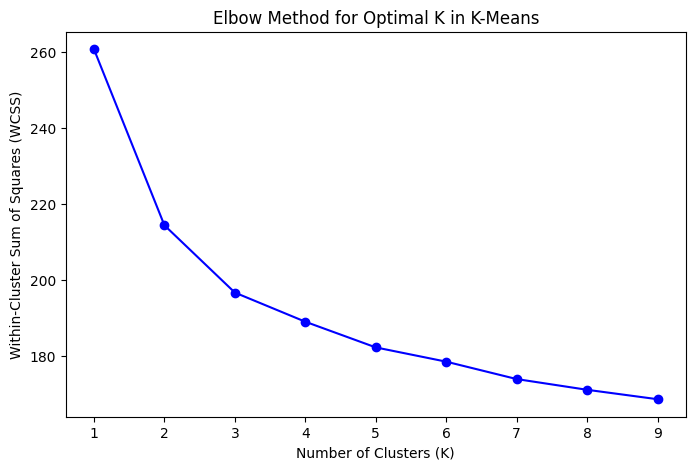

In [31]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 10)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()


Kmeans, GMM, Agglomerative with Silhouette Score & Davies-Bouldin Index¶

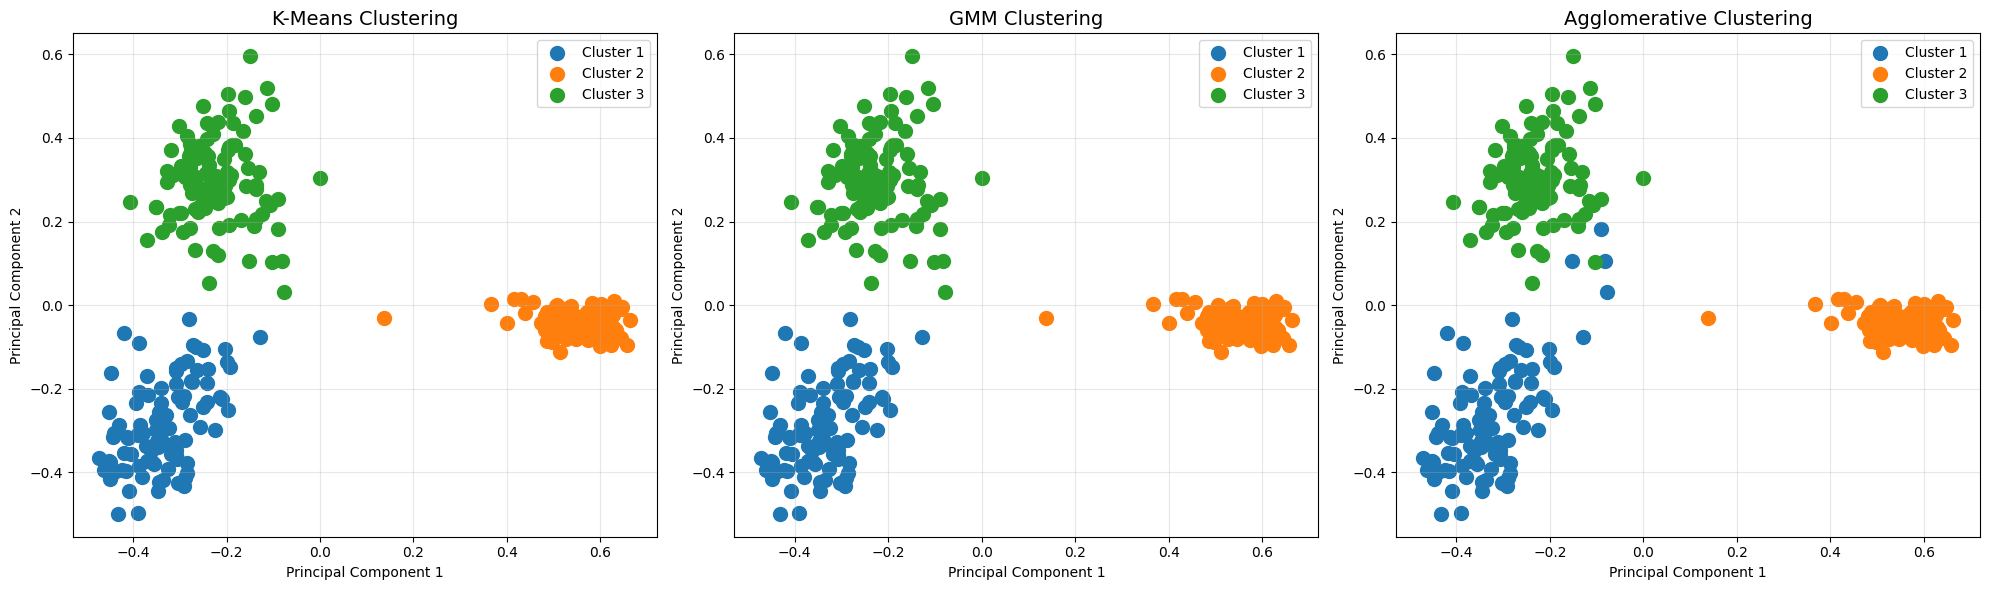

Comparison of Clustering Algorithms:
               Silhouette Score  Davies-Bouldin Index
K-Means                0.173035              2.556783
GMM                    0.173035              2.556783
Agglomerative          0.172293              2.585212


In [32]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'embeddings' and 'entities' are predefined
# embeddings = [[...], [...], ...]
# entities = ["Entity 1", "Entity 2", ...]

# Convert embeddings to numpy array
embeddings_array = np.array(embeddings)

# Set the number of clusters
optimal_clusters = 3

# Initialize a PCA instance for dimensionality reduction
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

# Initialize algorithms
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)

# Dictionary to store results
results = {}

# Function to evaluate and store results
def evaluate_clustering(name, labels, embeddings):
    silhouette_avg = silhouette_score(embeddings, labels)
    davies_bouldin = davies_bouldin_score(embeddings, labels)
    results[name] = {"Silhouette Score": silhouette_avg, "Davies-Bouldin Index": davies_bouldin}
    return labels

# 1. K-Means
kmeans_labels = kmeans.fit_predict(embeddings_array)
evaluate_clustering("K-Means", kmeans_labels, embeddings_array)

# 2. GMM
gmm_labels = gmm.fit_predict(embeddings_array)
evaluate_clustering("GMM", gmm_labels, embeddings_array)

# 3. Agglomerative Clustering
agglo_labels = agglomerative.fit_predict(embeddings_array)
evaluate_clustering("Agglomerative", agglo_labels, embeddings_array)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
algorithms = {
    "K-Means": kmeans_labels,
    "GMM": gmm_labels,
    "Agglomerative": agglo_labels
}

for ax, (name, labels) in zip(axes, algorithms.items()):
    for cluster in range(optimal_clusters):
        cluster_points = embeddings_2d[labels == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}", s=100)
    ax.set_title(f"{name} Clustering", fontsize=14)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print the comparison table
results_df = pd.DataFrame(results).T
print("Comparison of Clustering Algorithms:")
print(results_df)


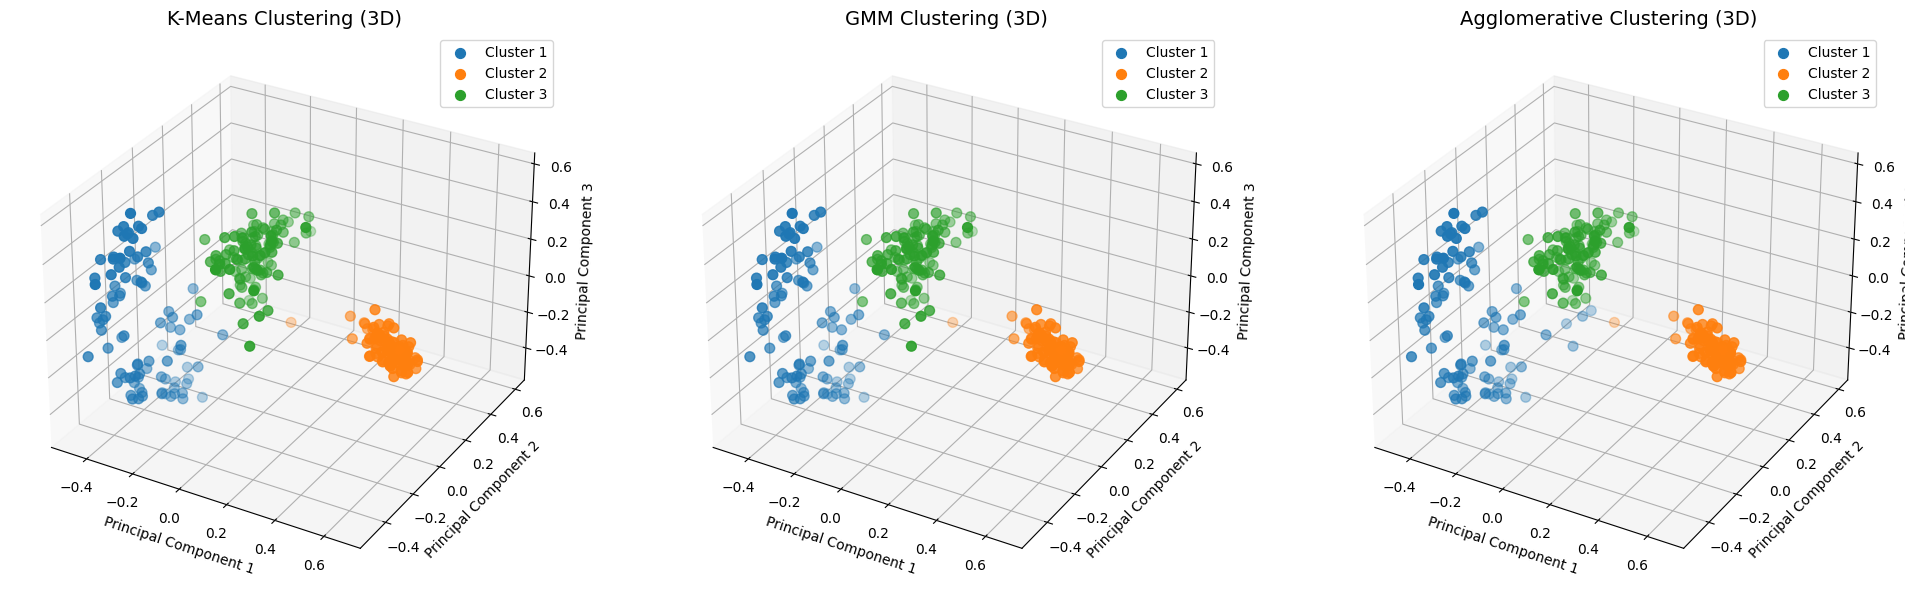

Comparison of Clustering Algorithms:
               Silhouette Score  Davies-Bouldin Index
K-Means                0.173035              2.556783
GMM                    0.173035              2.556783
Agglomerative          0.172293              2.585212


In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'embeddings' and 'entities' are predefined
# embeddings = [[...], [...], ...]
# entities = ["Entity 1", "Entity 2", ...]

# Convert embeddings to numpy array
embeddings_array = np.array(embeddings)

# Set the number of clusters
optimal_clusters = 3

# Initialize PCA for both 2D and 3D visualization
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
embeddings_2d = pca_2d.fit_transform(embeddings_array)
embeddings_3d = pca_3d.fit_transform(embeddings_array)

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)

# Dictionary to store results
results = {}

# Function to evaluate clustering algorithms
def evaluate_clustering(name, labels, embeddings):
    if len(set(labels)) > 1:  # Ensure multiple clusters exist
        silhouette_avg = silhouette_score(embeddings, labels)
        davies_bouldin = davies_bouldin_score(embeddings, labels)
    else:
        silhouette_avg = davies_bouldin = None  # Avoid errors with a single cluster
    results[name] = {"Silhouette Score": silhouette_avg, "Davies-Bouldin Index": davies_bouldin}
    return labels

# Fit and evaluate models
kmeans_labels = evaluate_clustering("K-Means", kmeans.fit_predict(embeddings_array), embeddings_array)
gmm_labels = evaluate_clustering("GMM", gmm.fit_predict(embeddings_array), embeddings_array)
agglo_labels = evaluate_clustering("Agglomerative", agglomerative.fit_predict(embeddings_array), embeddings_array)

# 3D Visualization
fig = plt.figure(figsize=(20, 6))
for i, (name, labels) in enumerate(algorithms.items()):
    ax = fig.add_subplot(1, 3, i + 1, projection="3d")
    for cluster in range(optimal_clusters):
        cluster_points = embeddings_3d[np.where(labels == cluster)[0]]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {cluster + 1}", s=50)
    
    ax.set_title(f"{name} Clustering (3D)", fontsize=14)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.legend()

plt.tight_layout()
plt.show()

# Print the comparison table
results_df = pd.DataFrame(results).T
print("Comparison of Clustering Algorithms:")
print(results_df)


In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming 'embeddings' and 'entities' are predefined
# embeddings = [[...], [...], ...]
# entities = ["Entity 1", "Entity 2", ...]

# Convert embeddings to numpy array
embeddings_array = np.array(embeddings)

# Set the number of clusters
optimal_clusters = 3

# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3)
embeddings_3d = pca_3d.fit_transform(embeddings_array)

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)

# Dictionary to store results
results = {}

# Function to evaluate clustering algorithms
def evaluate_clustering(name, labels, embeddings):
    if len(set(labels)) > 1:  # Ensure multiple clusters exist
        silhouette_avg = silhouette_score(embeddings, labels)
        davies_bouldin = davies_bouldin_score(embeddings, labels)
    else:
        silhouette_avg = davies_bouldin = None  # Avoid errors with a single cluster
    results[name] = {"Silhouette Score": silhouette_avg, "Davies-Bouldin Index": davies_bouldin}
    return labels

# Fit and evaluate models
kmeans_labels = evaluate_clustering("K-Means", kmeans.fit_predict(embeddings_array), embeddings_array)
gmm_labels = evaluate_clustering("GMM", gmm.fit_predict(embeddings_array), embeddings_array)
agglo_labels = evaluate_clustering("Agglomerative", agglomerative.fit_predict(embeddings_array), embeddings_array)

# Function to create interactive 3D scatter plot
def plot_3d_clusters(embeddings_3d, labels, title):
    df = pd.DataFrame(embeddings_3d, columns=["PC1", "PC2", "PC3"])
    df["Cluster"] = labels  # Assign cluster labels
    
    fig = px.scatter_3d(df, x="PC1", y="PC2", z="PC3", color=df["Cluster"].astype(str),
                        title=title, opacity=0.8, symbol=df["Cluster"].astype(str),
                        color_discrete_sequence=px.colors.qualitative.Set1)

    fig.update_traces(marker=dict(size=6))
    fig.update_layout(legend_title_text="Clusters")

    fig.show()

# Plot 3D visualizations for each algorithm
plot_3d_clusters(embeddings_3d, kmeans_labels, "K-Means Clustering (Interactive 3D)")
plot_3d_clusters(embeddings_3d, gmm_labels, "GMM Clustering (Interactive 3D)")
plot_3d_clusters(embeddings_3d, agglo_labels, "Agglomerative Clustering (Interactive 3D)")

# Print the comparison table
results_df = pd.DataFrame(results).T
print("Comparison of Clustering Algorithms:")
print(results_df)


Comparison of Clustering Algorithms:
               Silhouette Score  Davies-Bouldin Index
K-Means                0.173035              2.556783
GMM                    0.173035              2.556783
Agglomerative          0.172293              2.585212


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
    fowlkes_mallows_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
)
import numpy as np

# Step 1: Load the CSV file
file_path = "/kaggle/input/person-country-device-tree/Person_Country_Device_Tree.csv"  # Replace with your actual file path
# Skip the first row
data = pd.read_csv(file_path, skiprows=1, header=None, names=["Link", "Ground_truth"])
# Step 2: Extract entities and ground truth
data=data.head(300)
entities = data["Link"].tolist()
ground_truth_categories = data["Ground_truth"].tolist()

# Step 3: Convert ground truth categories to numerical labels
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(ground_truth_categories)

# Print true labels (for verification)
print("Entities:", entities)
print("True Labels:", true_labels)


Entities: ['http://dbpedia.org/resource/Caitlin_Blackwood', 'http://dbpedia.org/resource/Calli_Cox', 'http://dbpedia.org/resource/Cameron_Hall_(actor)', 'http://dbpedia.org/resource/Camilla_Lundén', 'http://dbpedia.org/resource/Camilla_Sparv', 'http://dbpedia.org/resource/Camille_Japy', 'http://dbpedia.org/resource/Camille_Razat', 'http://dbpedia.org/resource/Candy_Apples', 'http://dbpedia.org/resource/Capri_Anderson', 'http://dbpedia.org/resource/Caressa_Savage', 'http://dbpedia.org/resource/Carin_Swensson', 'http://dbpedia.org/resource/Carl-Axel_Elfving', 'http://dbpedia.org/resource/Carl-Axel_Heiknert', 'http://dbpedia.org/resource/Carl-Gunnar_Wingård', 'http://dbpedia.org/resource/Carl_Barcklind', 'http://dbpedia.org/resource/Carl_Billquist', 'http://dbpedia.org/resource/Carl_Forgione', 'http://dbpedia.org/resource/Carl_Hagman', 'http://dbpedia.org/resource/Carl_Ström', 'http://dbpedia.org/resource/Carles_Canut', 'http://dbpedia.org/resource/Carlos_Cuevas', 'http://dbpedia.org/reso

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
    fowlkes_mallows_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment

# Assuming 'embeddings' is a numpy array or list of vectors and 'true_labels' are the actual labels
# Replace `embeddings` and `true_labels` with your actual data.
# Example: embeddings = [[...], [...]], true_labels = [...]

# Step 1: Preprocess the data
scaler = StandardScaler()
embeddings_array = scaler.fit_transform(np.array(embeddings))

# Step 2: Set the number of clusters (e.g., based on the Elbow Method)
optimal_clusters = 3

# Step 3: Apply KMeans, GMM, and Agglomerative Clustering

# KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(embeddings_array)
kmeans_labels = kmeans.labels_

# GMM
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(embeddings_array)
gmm_labels = gmm.predict(embeddings_array)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_clustering.fit(embeddings_array)
agg_labels = agg_clustering.labels_

# Step 4: Map predicted labels to true labels using Hungarian Algorithm
def map_labels(true_labels, predicted_labels):
    # Create a confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    # Find optimal mapping using Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(-cm)  # Negate for maximization
    mapping = dict(zip(col_ind, row_ind))
    # Map the predicted labels
    mapped_labels = np.array([mapping[label] for label in predicted_labels])
    return mapped_labels

# Map predicted labels for all clustering methods
kmeans_mapped_labels = map_labels(true_labels, kmeans_labels)
gmm_mapped_labels = map_labels(true_labels, gmm_labels)
agg_mapped_labels = map_labels(true_labels, agg_labels)

# Step 5: Calculate metrics for each clustering algorithm
def calculate_metrics(true_labels, predicted_labels):
    ari = adjusted_rand_score(true_labels, predicted_labels)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    ami = adjusted_mutual_info_score(true_labels, predicted_labels)
    fmi = fowlkes_mallows_score(true_labels, predicted_labels)
    homogeneity = homogeneity_score(true_labels, predicted_labels)
    completeness = completeness_score(true_labels, predicted_labels)
    v_measure = v_measure_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    return ari, nmi, ami, fmi, homogeneity, completeness, v_measure, precision, recall, f1

# Calculate metrics for KMeans
kmeans_metrics = calculate_metrics(true_labels, kmeans_mapped_labels)

# Calculate metrics for GMM
gmm_metrics = calculate_metrics(true_labels, gmm_mapped_labels)

# Calculate metrics for Agglomerative Clustering
agg_metrics = calculate_metrics(true_labels, agg_mapped_labels)

# Step 6: Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Metric': ['ARI', 'NMI', 'AMI', 'FMI', 'Homogeneity', 'Completeness', 'V-Measure', 'Precision', 'Recall', 'F1-Score'],
    'KMeans': kmeans_metrics,
    'GMM': gmm_metrics,
    'Agglomerative': agg_metrics
})

# Set Metric as index for better readability
metrics_df.set_index('Metric', inplace=True)

# Display the comparison table
print(metrics_df)


                KMeans       GMM  Agglomerative
Metric                                         
ARI           0.950943  0.950943       0.970252
NMI           0.939365  0.939365       0.953246
AMI           0.938992  0.938992       0.952958
FMI           0.967200  0.967200       0.980102
Homogeneity   0.939009  0.939009       0.953232
Completeness  0.939722  0.939722       0.953261
V-Measure     0.939365  0.939365       0.953246
Precision     0.984127  0.984127       0.990032
Recall        0.983333  0.983333       0.990000
F1-Score      0.983323  0.983323       0.990000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Query_KG with Word2Vec

In [37]:
import pandas as pd
import requests
import numpy as np
import gensim.downloader as api
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score,
    fowlkes_mallows_score, homogeneity_score, completeness_score, v_measure_score,
    precision_score, recall_score, f1_score
)
from scipy.optimize import linear_sum_assignment
import nltk

nltk.download("punkt")  # Ensure tokenization works

# ✅ Load Pre-trained Word2Vec Model (GoogleNews-300)
word2vec_model = api.load("word2vec-google-news-300")  # Takes some time to download

# ✅ Define DBpedia SPARQL Endpoint
SPARQL_ENDPOINT = "https://dbpedia.org/sparql"

# ✅ Function to Fetch Labels & Abstracts for Entities
def fetch_text_data(entity):
    query = f"""
    SELECT ?label ?abstract WHERE {{
        <{entity}> rdfs:label ?label .
        OPTIONAL {{ <{entity}> dbo:abstract ?abstract . FILTER (lang(?abstract) = "en") }}
        FILTER (lang(?label) = "en")
    }} LIMIT 1
    """
    response = requests.get(SPARQL_ENDPOINT, params={"query": query, "format": "json"})
    
    if response.status_code == 200:
        results = response.json().get("results", {}).get("bindings", [])
        if results:
            label = results[0].get("label", {}).get("value", "")
            abstract = results[0].get("abstract", {}).get("value", "")
            return f"{label}. {abstract}" if abstract else label
    return ""

# ✅ Fetch Text Descriptions for Entities
data = data[['Link']].drop_duplicates()  # Keep unique entity links
entities = data["Link"].tolist()
entity_texts = [fetch_text_data(entity) for entity in entities]

# ✅ Convert Texts to Word2Vec Embeddings
def text_to_embedding(text, model, embedding_dim=300):
    words = word_tokenize(text.lower())  # Tokenize & convert to lowercase
    valid_vectors = [model[word] for word in words if word in model]
    
    if valid_vectors:
        return np.mean(valid_vectors, axis=0)  # Average word vectors
    else:
        return np.zeros(embedding_dim)  # Return zero vector if no valid words

# ✅ Generate Word2Vec Embeddings
embeddings = np.array([text_to_embedding(text, word2vec_model) for text in entity_texts])

# ✅ Print Embeddings Info
print("Embeddings shape:", embeddings.shape)
print("Sample embedding:", embeddings[0])

# ✅ Normalize Embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# ✅ Set Optimal Cluster Count
optimal_clusters = 3

# ✅ Apply Clustering Algorithms
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(embeddings_scaled)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42).fit(embeddings_scaled)
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters).fit(embeddings_scaled)

# ✅ Get Cluster Labels
kmeans_labels = kmeans.labels_
gmm_labels = gmm.predict(embeddings_scaled)
agg_labels = agg_clustering.labels_

# ✅ Function to Map Predicted Labels to True Labels
def map_labels(true_labels, predicted_labels):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = dict(zip(col_ind, row_ind))
    return np.array([mapping[label] for label in predicted_labels])

# ✅ Apply Hungarian Algorithm for Label Mapping
kmeans_mapped_labels = map_labels(true_labels, kmeans_labels)
gmm_mapped_labels = map_labels(true_labels, gmm_labels)
agg_mapped_labels = map_labels(true_labels, agg_labels)

# ✅ Function to Calculate Metrics
def calculate_metrics(true_labels, predicted_labels):
    return [
        adjusted_rand_score(true_labels, predicted_labels),
        normalized_mutual_info_score(true_labels, predicted_labels),
        adjusted_mutual_info_score(true_labels, predicted_labels),
        fowlkes_mallows_score(true_labels, predicted_labels),
        homogeneity_score(true_labels, predicted_labels),
        completeness_score(true_labels, predicted_labels),
        v_measure_score(true_labels, predicted_labels),
        precision_score(true_labels, predicted_labels, average="weighted"),
        recall_score(true_labels, predicted_labels, average="weighted"),
        f1_score(true_labels, predicted_labels, average="weighted")
    ]

# ✅ Compute Metrics for Each Clustering Model
kmeans_metrics = calculate_metrics(true_labels, kmeans_mapped_labels)
gmm_metrics = calculate_metrics(true_labels, gmm_mapped_labels)
agg_metrics = calculate_metrics(true_labels, agg_mapped_labels)

# ✅ Create DataFrame for Comparison
metrics_df = pd.DataFrame({
    'Metric': ['ARI', 'NMI', 'AMI', 'FMI', 'Homogeneity', 'Completeness', 'V-Measure', 'Precision', 'Recall', 'F1-Score'],
    'KMeans': kmeans_metrics,
    'GMM': gmm_metrics,
    'Agglomerative': agg_metrics
}).set_index('Metric')

# ✅ Display the Comparison Table
print(metrics_df)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Embeddings shape: (300, 300)
Sample embedding: [ 0.00913272  0.09534525  0.00578242  0.05952785  0.00942595  0.02849811
 -0.01010663 -0.10363239  0.04242739  0.06921121  0.00411855 -0.15064007
 -0.08017747 -0.015556   -0.05325085  0.0631276   0.03664498  0.11784662
 -0.02098017 -0.00862188 -0.06779762  0.05961808 -0.01659626 -0.04374164
  0.01621279 -0.03620977 -0.10801564  0.14232337  0.03555033 -0.04417312
  0.01543659  0.04556938 -0.04657115 -0.00436302 -0.0340072  -0.03927106
 -0.01880596  0.05603094  0.03738702  0.05057907 -0.00577976 -0.0467317
  0.11331575  0.01379395  0.04815409 -0.01829993 -0.03521198 -0.00367538
 -0.04296344  0.01617962 -0.01104322  0.00997792  0.07968571 -0.0280357
 -0.0442611  -0.06657907 -0.09350055 -0.00720348 -0.0586309  -0.05692192
 -0.04362687  0.05308201 -0.03156778 -0.08649743 -0.00387441  0.01052193
 -0.00158691  0.0476804  -0.01495195

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



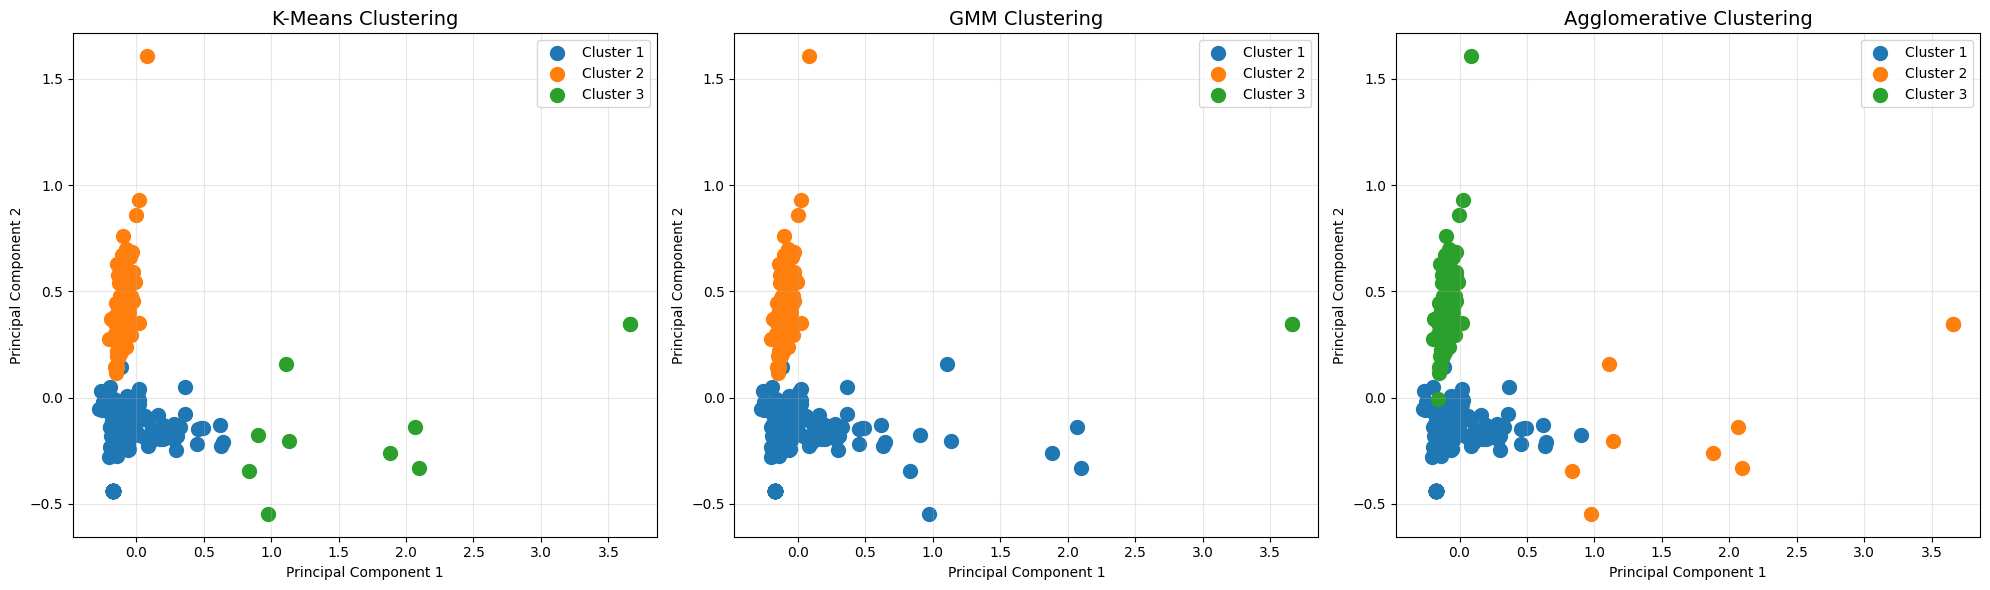

Comparison of Clustering Algorithms:
               Silhouette Score  Davies-Bouldin Index
K-Means                0.221246              1.499028
GMM                    0.200932              1.152938
Agglomerative          0.220264              1.505110


In [39]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'embeddings' and 'entities' are predefined
# embeddings = [[...], [...], ...]
# entities = ["Entity 1", "Entity 2", ...]

# Convert embeddings to numpy array
embeddings_array = np.array(embeddings)

# Set the number of clusters
optimal_clusters = 3

# Initialize a PCA instance for dimensionality reduction
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

# Initialize algorithms
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)

# Dictionary to store results
results = {}

# Function to evaluate and store results
def evaluate_clustering(name, labels, embeddings):
    silhouette_avg = silhouette_score(embeddings, labels)
    davies_bouldin = davies_bouldin_score(embeddings, labels)
    results[name] = {"Silhouette Score": silhouette_avg, "Davies-Bouldin Index": davies_bouldin}
    return labels

# 1. K-Means
kmeans_labels = kmeans.fit_predict(embeddings_array)
evaluate_clustering("K-Means", kmeans_labels, embeddings_array)

# 2. GMM
gmm_labels = gmm.fit_predict(embeddings_array)
evaluate_clustering("GMM", gmm_labels, embeddings_array)

# 3. Agglomerative Clustering
agglo_labels = agglomerative.fit_predict(embeddings_array)
evaluate_clustering("Agglomerative", agglo_labels, embeddings_array)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
algorithms = {
    "K-Means": kmeans_labels,
    "GMM": gmm_labels,
    "Agglomerative": agglo_labels
}

for ax, (name, labels) in zip(axes, algorithms.items()):
    for cluster in range(optimal_clusters):
        cluster_points = embeddings_2d[labels == cluster]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}", s=100)
    ax.set_title(f"{name} Clustering", fontsize=14)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print the comparison table
results_df = pd.DataFrame(results).T
print("Comparison of Clustering Algorithms:")
print(results_df)


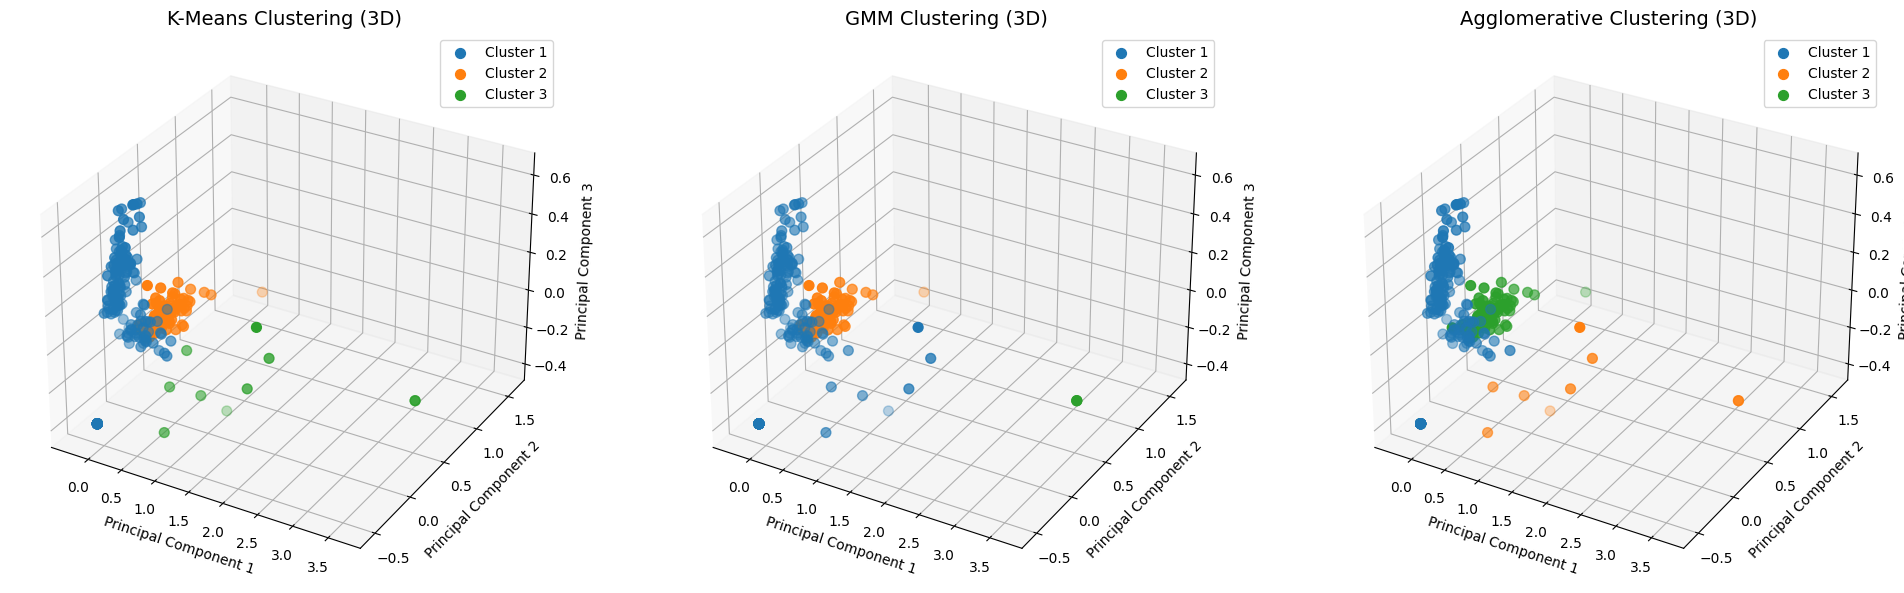

Comparison of Clustering Algorithms:
               Silhouette Score  Davies-Bouldin Index
K-Means                0.221246              1.499028
GMM                    0.200932              1.152938
Agglomerative          0.220264              1.505110


In [40]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'embeddings' and 'entities' are predefined
# embeddings = [[...], [...], ...]
# entities = ["Entity 1", "Entity 2", ...]

# Convert embeddings to numpy array
embeddings_array = np.array(embeddings)

# Set the number of clusters
optimal_clusters = 3

# Initialize PCA for both 2D and 3D visualization
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)
embeddings_2d = pca_2d.fit_transform(embeddings_array)
embeddings_3d = pca_3d.fit_transform(embeddings_array)

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)

# Dictionary to store results
results = {}

# Function to evaluate clustering algorithms
def evaluate_clustering(name, labels, embeddings):
    if len(set(labels)) > 1:  # Ensure multiple clusters exist
        silhouette_avg = silhouette_score(embeddings, labels)
        davies_bouldin = davies_bouldin_score(embeddings, labels)
    else:
        silhouette_avg = davies_bouldin = None  # Avoid errors with a single cluster
    results[name] = {"Silhouette Score": silhouette_avg, "Davies-Bouldin Index": davies_bouldin}
    return labels

# Fit and evaluate models
kmeans_labels = evaluate_clustering("K-Means", kmeans.fit_predict(embeddings_array), embeddings_array)
gmm_labels = evaluate_clustering("GMM", gmm.fit_predict(embeddings_array), embeddings_array)
agglo_labels = evaluate_clustering("Agglomerative", agglomerative.fit_predict(embeddings_array), embeddings_array)

# 3D Visualization
fig = plt.figure(figsize=(20, 6))
for i, (name, labels) in enumerate(algorithms.items()):
    ax = fig.add_subplot(1, 3, i + 1, projection="3d")
    for cluster in range(optimal_clusters):
        cluster_points = embeddings_3d[np.where(labels == cluster)[0]]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {cluster + 1}", s=50)
    
    ax.set_title(f"{name} Clustering (3D)", fontsize=14)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.legend()

plt.tight_layout()
plt.show()

# Print the comparison table
results_df = pd.DataFrame(results).T
print("Comparison of Clustering Algorithms:")
print(results_df)
